In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
data = load_breast_cancer()

In [26]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [27]:
X, y = data.data, data.target

In [28]:
X.shape, y.shape

((569, 30), (569,))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [31]:
scaler = StandardScaler()

In [32]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
X_train_scaled = torch.from_numpy(X_train_scaled.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
X_test_scaled = torch.from_numpy(X_test_scaled.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [34]:
y_train.shape

torch.Size([455, 1])

$$\ell_c(x, y) = L_c = \{l_{1,c},\dots,l_{N,c}\}^\top, \quad
    l_{n,c} = - w_{n,c} \left[ p_c y_{n,c} \cdot \log \sigma(x_{n,c})
    + (1 - y_{n,c}) \cdot \log (1 - \sigma(x_{n,c})) \right]$$

In [55]:
model = nn.Sequential(    
    nn.Linear(X_train.shape[1], 1), 
    nn.Sigmoid()
)

In [56]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model.parameters())

In [57]:
n_epochs = 2000

train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

train_accuracy = np.zeros(n_epochs)
test_accuracy = np.zeros(n_epochs)

for epoch in range(n_epochs):
    optimizer.zero_grad()
    
    outputs = model(X_train_scaled)
    loss = criterion(outputs, y_train)
    
    loss.backward()
    optimizer.step()        
    
    output_test = model(X_test_scaled)
    loss_test = criterion(output_test, y_test)
    
    with torch.no_grad():
        train_pred = model(X_train_scaled)
        train_pred = np.round(train_pred.numpy())
        train_acc = np.mean(train_pred == y_train.numpy())
        train_accuracy[epoch] = train_acc
        
        test_pred = model(X_test_scaled)
        test_pred = np.round(test_pred.numpy())
        test_acc = np.mean(test_pred == y_test.numpy())
        test_accuracy[epoch] = test_acc
    
    test_losses[epoch] = loss_test.item()
    train_losses[epoch] = loss.item()
    
    if (epoch + 1) % 50 == 0:
        print(f"Epoch: {epoch + 1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}")

Epoch: 50/2000, Train Loss: 0.5661, Test Loss: 0.5667
Epoch: 100/2000, Train Loss: 0.5414, Test Loss: 0.5408
Epoch: 150/2000, Train Loss: 0.5269, Test Loss: 0.5259
Epoch: 200/2000, Train Loss: 0.5170, Test Loss: 0.5163
Epoch: 250/2000, Train Loss: 0.5100, Test Loss: 0.5094
Epoch: 300/2000, Train Loss: 0.5048, Test Loss: 0.5042
Epoch: 350/2000, Train Loss: 0.5007, Test Loss: 0.5001
Epoch: 400/2000, Train Loss: 0.4975, Test Loss: 0.4968
Epoch: 450/2000, Train Loss: 0.4949, Test Loss: 0.4941
Epoch: 500/2000, Train Loss: 0.4926, Test Loss: 0.4918
Epoch: 550/2000, Train Loss: 0.4907, Test Loss: 0.4899
Epoch: 600/2000, Train Loss: 0.4890, Test Loss: 0.4883
Epoch: 650/2000, Train Loss: 0.4876, Test Loss: 0.4869
Epoch: 700/2000, Train Loss: 0.4863, Test Loss: 0.4856
Epoch: 750/2000, Train Loss: 0.4851, Test Loss: 0.4846
Epoch: 800/2000, Train Loss: 0.4840, Test Loss: 0.4836
Epoch: 850/2000, Train Loss: 0.4831, Test Loss: 0.4827
Epoch: 900/2000, Train Loss: 0.4822, Test Loss: 0.4820
Epoch: 950/

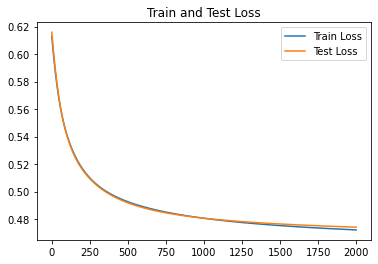

In [58]:
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.title("Train and Test Loss", fontsize=12)
plt.legend()
plt.show()

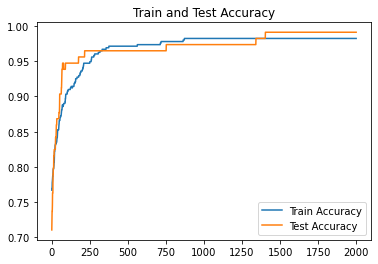

In [59]:
plt.plot(train_accuracy, label="Train Accuracy")
plt.plot(test_accuracy, label="Test Accuracy")
plt.title("Train and Test Accuracy", fontsize=12)
plt.legend()
plt.show()

In [60]:
with torch.no_grad():
    p_train = model(X_train_scaled)
    p_train = np.round(p_train.numpy())
    train_acc = np.mean(p_train == y_train.numpy())
    
    p_test = model(X_test_scaled)
    p_test = np.round(p_test.numpy())
    test_acc = np.mean(p_test == y_test.numpy())
    
print(f"Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

Train Acc: 0.9824, Test Acc: 0.9912
